<a href="https://colab.research.google.com/github/jrim42/DS_boostcourse_13/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코칭스터디 3주차 미션

In [ ]:
# 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import koreanize_matplotlib

plt.rc('axes', unicode_minus=False)
sns.set_palette("Set2")

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

### Q1. 연령대별 허리둘레에 대한 **기술통계**

In [ ]:
# dictionary
age_code = {1: '0~4세',
            2: '5~9세',
            3: '10~14세',
            4: '15~19세',
            5: '20~24세',
            6: '25~29세',
            7: '30~34세',
            8: '35~39세',
            9: '40~44세',
            10: '45~49세',
            11: '50~54세',
            12: '55~59세',
            13: '60~64세',
            14: '65~69세',
            15: '70~74세',
            16: '75~79세',
            17: '80~84세',
            18: '85세+'}


In [ ]:
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

result = df.groupby('연령대')['허리둘레'].describe()

result['count'] = result['count'].astype(int)
result['mean'] = result['mean'].round(4)
result['std'] = result['std'].round(4)

result

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244,75.1522,12.2518,47.5,67.5,73.4,81.0,999.0
25~29세,64898,77.7048,16.7357,48.0,69.0,76.5,84.2,999.0
30~34세,77517,81.0893,22.9881,49.0,72.0,80.1,88.0,999.0
35~39세,84621,82.0940,14.5221,9.2,75.0,82.0,89.0,999.0
40~44세,130912,80.4883,10.8031,42.1,73.0,80.0,87.0,999.0
45~49세,118357,80.8224,9.5216,40.0,74.0,81.0,87.0,137.0
50~54세,129833,81.0628,9.0954,6.5,75.0,81.0,87.0,142.0
55~59세,112175,81.7999,8.7304,32.0,76.0,82.0,87.5,139.0
60~64세,106491,82.7228,8.5962,0.0,77.0,83.0,88.0,137.0


---
### Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화

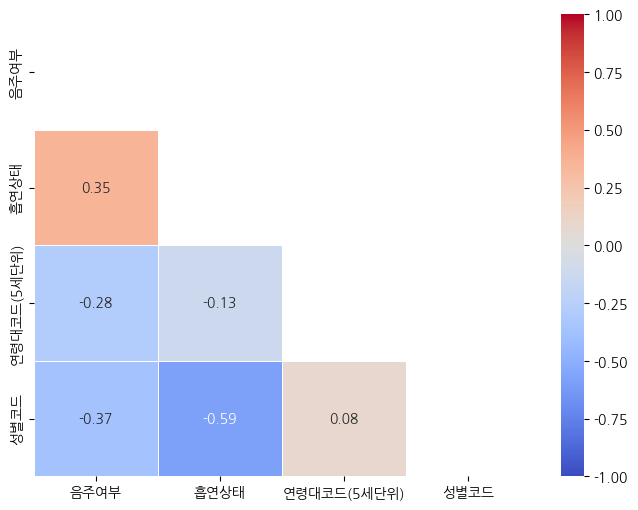

In [ ]:
selected_columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
correlation_data = df[selected_columns]

# 상관계수 계산
correlation_matrix = correlation_data.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1.0, vmax=1.0, center=0.0, mask=mask, linewidths=0.5)
plt.show()

---
### Q3. 흡연하는 사람과 음주하는 사람들의 수의 차이

In [ ]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df['흡연'] = df['흡연상태'].replace(smoke)
df['음주'] = df['음주여부'].replace(drink)

cross_tab = pd.crosstab(df['흡연'], df['음주'])
cross_tab

음주,마심,안마심
흡연,,
끊음,120779,55334
흡연안함,213743,394503
흡연중,162166,52845


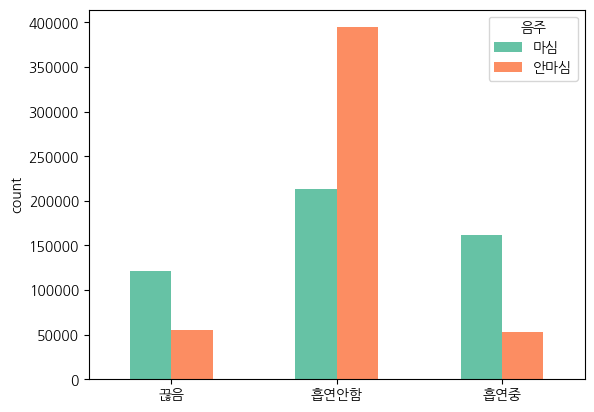

In [ ]:
cross_tab.plot(kind='bar')
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.show()

---
### Q4. 체중이 120Kg 이상인 사람의 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화

<Figure size 1500x500 with 0 Axes>

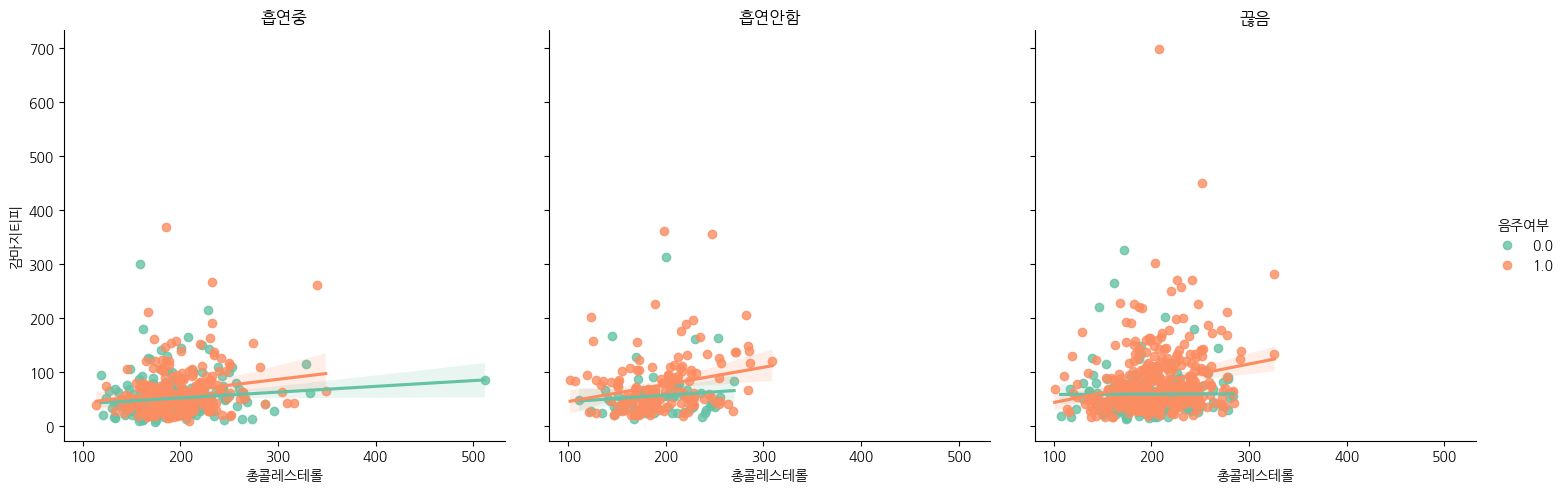

In [ ]:
# 120Kg 이상인 데이터 필터링
filtered_df = df[df['체중(5Kg 단위)'] >= 120][['총콜레스테롤', '감마지티피', '음주여부', '흡연상태']]

# 시각화
plt.figure(figsize=(15, 5))
smoking_status = ['흡연중', '흡연안함', '끊음']
g = sns.lmplot(data=filtered_df, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")
for i, title in enumerate(smoking_status):
    g.axes[0, i].set_title(title)

plt.subplots_adjust(wspace=0.1)
plt.show()

---
### Q5. 연령대, 성별 좌우 평균 시력의 시각화

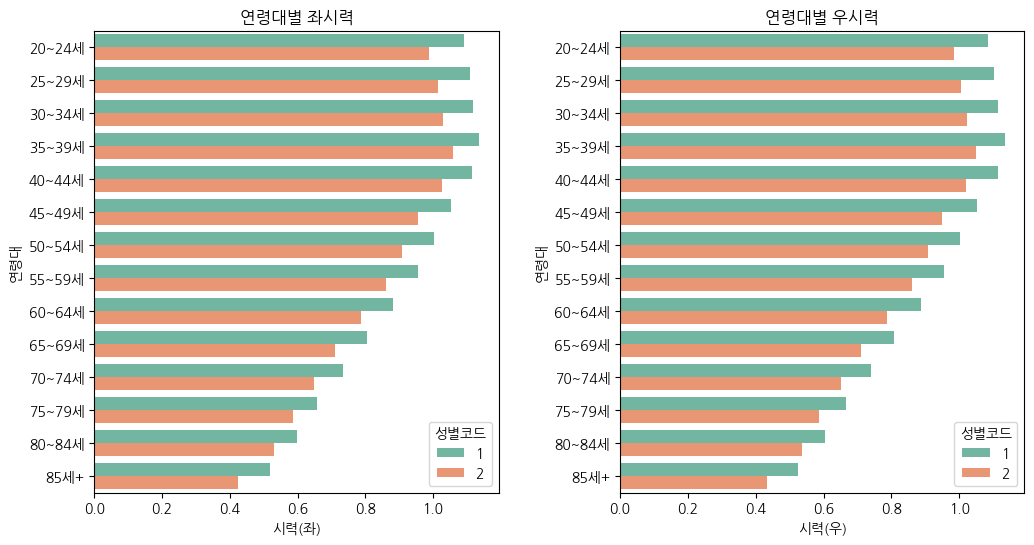

In [ ]:
# 평균 시력 계산
average_vision = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)] \
    .groupby(['연령대', '성별코드'])[['시력(좌)', '시력(우)']].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='시력(좌)', y='연령대', hue='성별코드', data=average_vision)
plt.title('연령대별 좌시력')

plt.subplot(1, 2, 2)
sns.barplot(x='시력(우)', y='연령대', hue='성별코드', data=average_vision)
plt.title('연령대별 우시력')

plt.subplots_adjust(wspace=0.3)
plt.show()